<a href="https://colab.research.google.com/github/keaan95/learning/blob/master/ml_tutorial_lovejoy_codemd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# to build pca plots, histograms to visualise our variables [as an alternative form of feature selection]
# familar in R but learning this in python
# thinking of a more interactive and intuitive way to demonstrate tuning + optimising hyperparameters e.g. by grid searching.

# pandas + numpy can more easily handle dataframes

import pandas as pd
import numpy as np
# matplot to make pretty plots
import matplotlib.pyplot as pl
import io

# import function to bring file into same directory
from google.colab import files
uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving data.csv to data.csv
saved file data.csv


In [4]:
# read in dataframe of breast cancer patient with histological parameters
df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
# data cleaning to ensure only parameters of interest are placed into our classifer 
df.drop( columns='id', axis=1, inplace = True)
df.drop( columns="Unnamed: 32",axis=1,inplace=True)

#mapping our variables into binaries of zero or one
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [9]:
df.columns[1]

## when dealing with a large dataset, a quick visual way to features that correlate well with being malignant or benign is to produce correlations
## 1 generically split the dataset into three broad categories

features_mean = list(df.columns[0:11])
features_se = list(df.columns[11:21])
features_worst = list(df.columns[21:31])

print (features_mean)
print (features_se)
print (features_worst)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


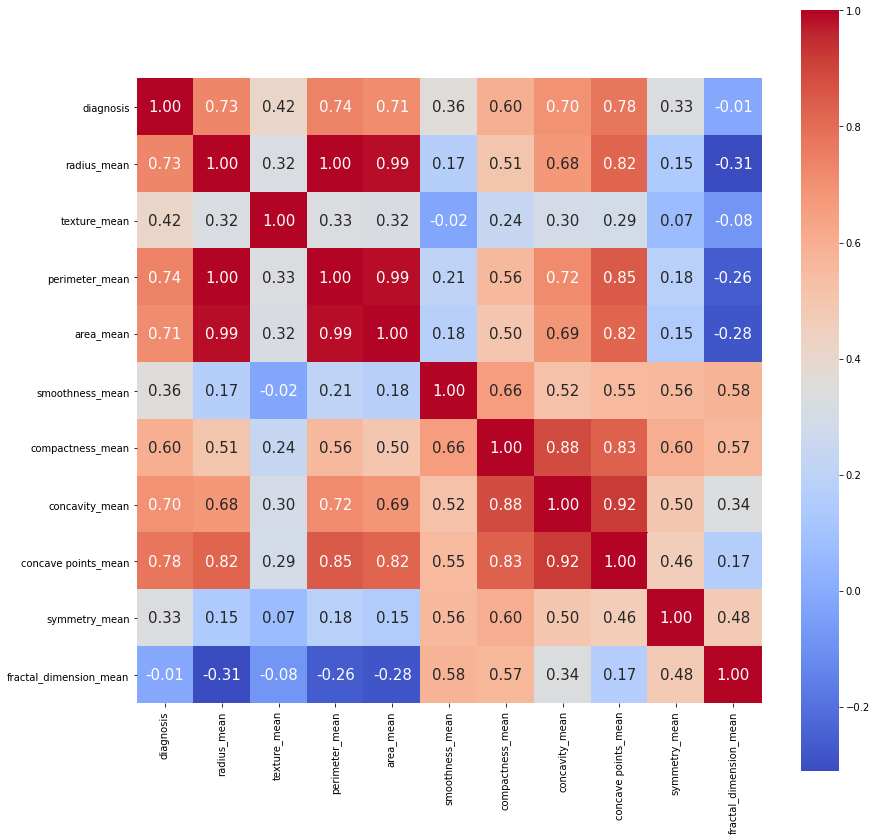

In [23]:
import seaborn as sns
import matplotlib.pyplot as pl



corr = df[features_mean].corr()
corr
pl.figure(figsize =(14,14))

sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')

In [37]:
## three baseline features that neither too highly correlated. avoid too many as to risk overfitting.
prediction_var = ['perimeter_mean', 'compactness_mean', 'concavity_mean', 'fractal_dimension_mean']

In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.15)
print ("Train shape", train.shape)
print ("Test shape", test.shape)

#setup the structure of the training data
train_x = train[prediction_var]
train_y = train.diagnosis

test_x = test[prediction_var]
test_y = test.diagnosis

Train shape (483, 31)
Test shape (86, 31)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier(n_estimators=300)  

In [47]:
model.fit(train_x, train_y)
model.predict(test_x)

model.predict(test_x)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [55]:
print ("Accuracy =", metrics.accuracy_score(prediction, test_y))
print ("Recall =", metrics.recall_score(prediction, test_y))
print ("Precision =", metrics.precision_score(prediction, test_y))

Accuracy = 0.8372093023255814
Recall = 0.8620689655172413
Precision = 0.7142857142857143


In [50]:
from sklearn.metrics import confusion_matrix

In [57]:
#Top=left is true-positive [malignant], bottom=right is true-negative [benign]
#Bottom=left is false-psoitive, top=right is false negative

confusion_matrix(test_y,prediction)

precision = precision_score(test_y,prediction)
recall = recall_score(test_y,prediction)

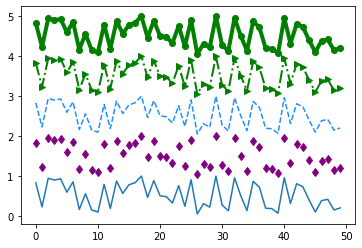

In [30]:
# Create random datasets with numpy random module
x = np.arange(50)
y = np.random.rand(50)

#Plot y using default line style and color x is automatically inferred
pl.plot(y)

# Plot x and y without line and purple diamon markers
pl.plot(x, y+1, marker ='d', linewidth=0, color="purple")

# Plot x and y using dotted line and 
pl.plot(x, y+2, color = 'dodgerblue', linestyle='--')

# Plot x and y using blue circle markers
pl.plot(x, y+3, color='green', linewidth=2, marker='>', linestyle="-.")

# Plot x and y using blue circle markers
pl.plot(x, y+4, color='green', linewidth=4, marker='o', linestyle="-")

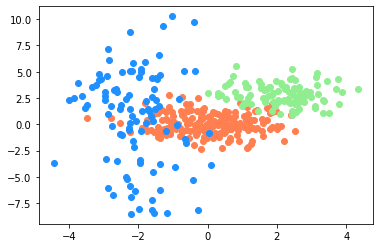

In [ ]:
pl.scatter (np.random.randn(200),np.random.randn(200), color="coral")
pl.scatter (np.random.randn(100)+2,np.random.randn(100)+3, color="lightgreen")
pl.scatter (np.random.randn(100)-2,np.random.randn(100)*4, color="dodgerblue")

array([ 0.85064837,  0.79661067, -0.30008613, -0.16191851, -1.15357223])